
📦 Sales Summary by Product:

  product  total_qty  revenue
0   Apple         15      7.5
1  Banana         35     10.5
2  Orange         18     10.8

🧮 Total Quantity Sold Across All Products: 68


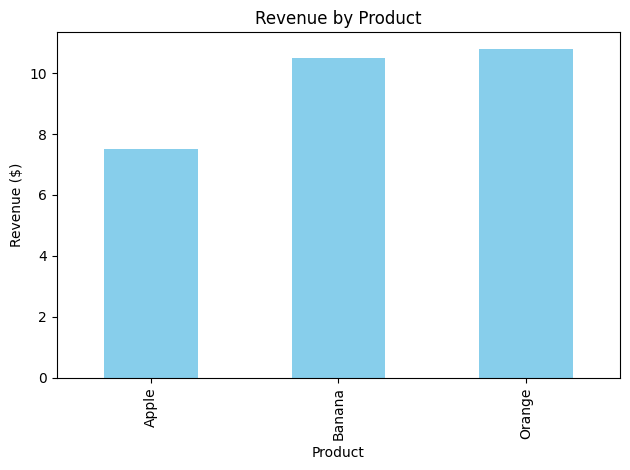

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to local SQLite DB
db_path = "sales_data.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Create 'sales' table if it doesn't exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Optional: Insert data if table is empty
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ("Apple", 10, 0.5),
        ("Banana", 20, 0.3),
        ("Apple", 5, 0.5),
        ("Orange", 8, 0.6),
        ("Banana", 15, 0.3),
        ("Orange", 10, 0.6)
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()

# Summary: Quantity and revenue per product
query_product_summary = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query_product_summary, conn)
print("\n📦 Sales Summary by Product:\n")
print(df)

# Summary: Total quantity sold
query_total_qty = "SELECT SUM(quantity) AS total_quantity_sold FROM sales"
total_qty_df = pd.read_sql_query(query_total_qty, conn)
total_qty = total_qty_df['total_quantity_sold'].iloc[0]
print(f"\n🧮 Total Quantity Sold Across All Products: {total_qty}")

# Plot revenue per product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Close connection
conn.close()
